Import all libraries

In [227]:
import numpy as np
# import scipy.linalg as sla
import matplotlib.pyplot as plt

from Logistic_Regression import LogisticRegression
from Logistic_Regression import softmax
# from sklearn import datasets
# from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

Generate the dataset (300x1) x 3 Classes

In [228]:
fst_class = 300
snd_class = 300
thd_class = 300
X_1 = np.c_[(np.full(fst_class, 1) + np.random.randn(fst_class),
            np.full(fst_class, 1) + np.random.randn(fst_class))]

X_2 = np.c_[(np.full(snd_class, 1) + np.random.randn(snd_class),
            np.full(snd_class, 4) + np.random.randn(snd_class))]

X_3 = np.c_[(np.full(thd_class, 4) + np.random.randn(thd_class),
            np.full(thd_class, 4) + np.random.randn(thd_class))]

Y_1 = np.full(fst_class, 0)
Y_2 = np.full(snd_class, 1)
Y_3 = np.full(thd_class, 2)

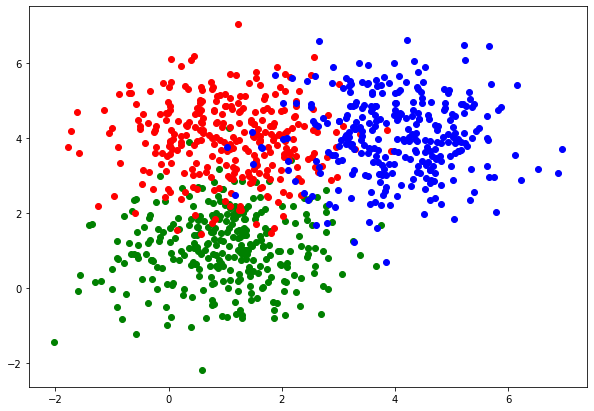

In [229]:
plt.figure(figsize=(10, 7))
plt.scatter(X_1[:, 0], X_1[:, 1], marker='o', c='g')
plt.scatter(X_2[:, 0], X_2[:, 1], marker='o', c='r')
plt.scatter(X_3[:, 0], X_3[:, 1], marker='o', c='b')
plt.show()

Preprocess and shuffle data:

In [230]:
a = np.vstack((X_1, X_2, X_3))
b = np.hstack((Y_1, Y_2, Y_3))
all = np.hstack((a, b.reshape(a.shape[0], 1)))
np.random.shuffle(all)

X = all[:, :2]
Y = all[:, 2]

Split in train and test:

In [231]:
from sklearn import preprocessing

X_train, X_test, Y_train, Y_test_ = train_test_split(X, Y, train_size=0.7)

X_train = preprocessing.minmax_scale(X_train.reshape(X_train.shape[0], 2), axis=0)
Y_train = preprocessing.minmax_scale(Y_train.reshape(Y_train.shape[0], 1), axis=0)
X_test = preprocessing.minmax_scale(X_test.reshape(X_test.shape[0], 2), axis=0)
Y_test = preprocessing.minmax_scale(Y_test_.reshape(Y_test_.shape[0], 1), axis=0)


Create, configure and train the model

In [232]:
lr = LogisticRegression()
lr.fit(X_train, Y_train, 3)
lr.train(lr=0.001, iter=1, L1=0.1, L2=0.1)

100%|██████████| 1/1 [00:00<00:00, 1375.18it/s]


Check metrics:

In [ ]:
predictions = np.argmax(lr.predict(X_test), axis=1)
print(f"MSE: {mse(preprocessing.minmax_scale(predictions), Y_test_)}")

Visualization

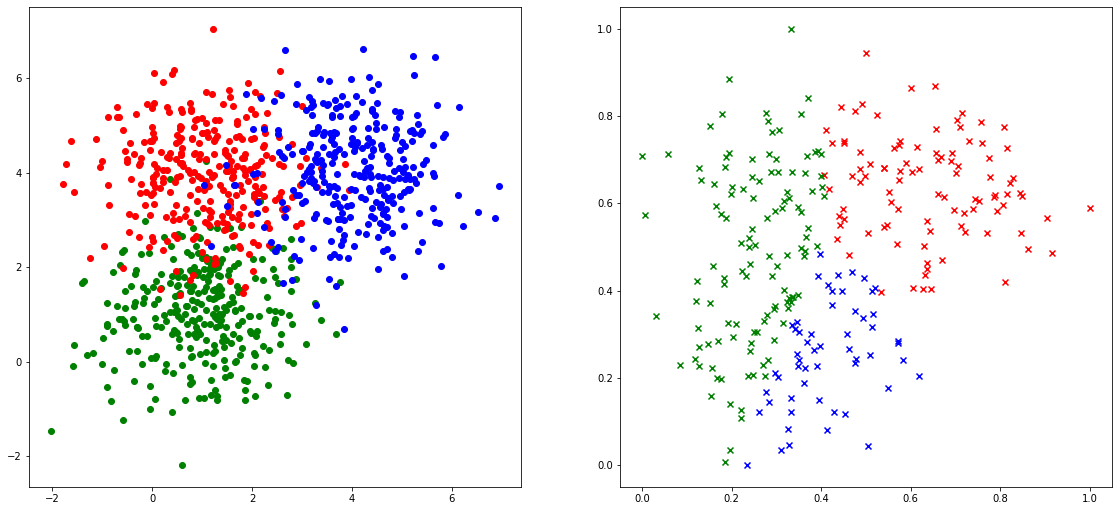

In [234]:
plt.figure(figsize=(30, 30))


input_plt = plt.subplot2grid((3, 3), (0, 0))
out_plt = plt.subplot2grid((3, 3), (0, 1))

input_plt.scatter(X_1[:, 0], X_1[:, 1], marker='o', c='g')
input_plt.scatter(X_2[:, 0], X_2[:, 1], marker='o', c='r')
input_plt.scatter(X_3[:, 0], X_3[:, 1], marker='o', c='b')

i = 0
for point in X_test:
    if predictions[i] == 0:
        out_plt.scatter(point[0], point[1], marker='x', c='red')
    elif predictions[i] == 1:
        out_plt.scatter(point[0], point[1], marker='x', c='green')
    elif predictions[i] == 2:
        out_plt.scatter(point[0], point[1], marker='x', c='blue')

    i += 1

plt.show()